In [216]:
import tensorflow as tf
import numpy as np

In [ ]:
height = tf.constant(np.array([1.4, 2., 3, 3.8]), dtype=tf.float32)
weight = tf.constant(np.array([0.8, 1.7, 1.6, 1.9]), dtype=tf.float32)

In [218]:
print(height.shape)
print(weight.shape)

(4,)
(4,)


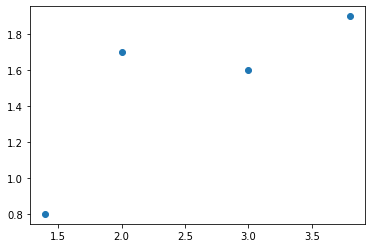

In [219]:
import matplotlib.pyplot as plt

plt.plot(height, weight, 'o')

In [220]:
from tensorflow import keras

In [221]:
model2 = keras.models.Sequential([
    keras.layers.Dense(5, input_shape=(1, )),
    keras.layers.Dense(1)
])



In [222]:
model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

In [223]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5)                 10        
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [224]:
model2.fit(
    height,
    weight,
    epochs=10
)

Epoch 1/10
1/1 [==============================] - 0s 390ms/step - loss: 0.3363 - mae: 0.5007
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 0.2011 - mae: 0.4020
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 0.1296 - mae: 0.3082
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 0.1124 - mae: 0.2557
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 0.1295 - mae: 0.2445
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 0.1539 - mae: 0.2644
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 0.1672 - mae: 0.2918
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 0.1643 - mae: 0.2877
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 0.1503 - mae: 0.2596
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 0.1317 - mae: 0.2415


tf.Tensor([0.8  1.44 2.08 2.72 3.36 4.  ], shape=(6,), dtype=float32)
1/1 [==============================] - 0s 101ms/step
[[0.38034227]
 [0.7323095 ]
 [1.0837402 ]
 [1.4357074 ]
 [1.7866015 ]
 [2.1385686 ]]
1/1 [==============================] - 0s 21ms/step


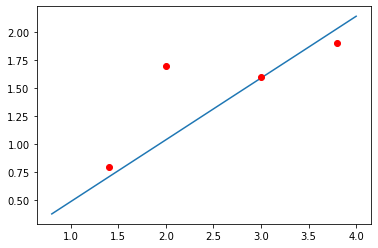

In [225]:
h1 = tf.constant(np.linspace(0.8, 4, 6), dtype=tf.float32)
print(h1)
print(model2.predict(h1))
plt.plot(
    h1.numpy().flatten(),
    model2.predict(h1),
)

plt.plot(height, weight, 'o', color='red')

In [226]:
model2.get_weights()

[array([[-0.03908844,  0.9323855 ,  0.43739012,  0.29992345, -0.8912479 ]],
       dtype=float32),
 array([ 0.01898825, -0.01778437,  0.01574077, -0.01958247,  0.01950926],
       dtype=float32),
 array([[-0.32336986],
        [ 0.66725165],
        [-0.90869135],
        [ 0.25584337],
        [-0.26408523]], dtype=float32),
 array([-0.01660773], dtype=float32)]

In [227]:
# weight = height * 0.7170686 - 0.25072294

def predict_weight(h, w1, b):
    return h * w1 + b

def loss(h, w, w1, b):
    return np.square(predict_weight(h, w1, b) - w)

In [228]:
def grad_descent(h, w, epochs):

    w1 = 1.
    b = 1.8333
    lr = 1e-3
    n = len(h)

    for i in range(epochs):
        weight_pred = predict_weight(h, w1, b)
        loss_val = loss(h, w, w1, b)

        w1d = (1/n) * np.dot(np.transpose(h), (weight_pred - w))
        bias_d = np.mean(weight_pred - w)

        w1 = w1 - lr * w1d
        b = b - lr * bias_d

        print(f'Epoch: {i}, Loss: {sum(loss_val):0.2f}, W: {w1:0.2f}')

    return w1, b

In [229]:
w1, b = grad_descent(height, weight, 1000)

Epoch: 0, Loss: 34.86, W: 0.99
Epoch: 1, Loss: 34.30, W: 0.98
Epoch: 2, Loss: 33.75, W: 0.98
Epoch: 3, Loss: 33.20, W: 0.97
Epoch: 4, Loss: 32.67, W: 0.96
Epoch: 5, Loss: 32.14, W: 0.95
Epoch: 6, Loss: 31.63, W: 0.95
Epoch: 7, Loss: 31.12, W: 0.94
Epoch: 8, Loss: 30.62, W: 0.93
Epoch: 9, Loss: 30.12, W: 0.92
Epoch: 10, Loss: 29.64, W: 0.92
Epoch: 11, Loss: 29.16, W: 0.91
Epoch: 12, Loss: 28.69, W: 0.90
Epoch: 13, Loss: 28.23, W: 0.90
Epoch: 14, Loss: 27.78, W: 0.89
Epoch: 15, Loss: 27.33, W: 0.88
Epoch: 16, Loss: 26.90, W: 0.87
Epoch: 17, Loss: 26.46, W: 0.87
Epoch: 18, Loss: 26.04, W: 0.86
Epoch: 19, Loss: 25.62, W: 0.85
Epoch: 20, Loss: 25.21, W: 0.85
Epoch: 21, Loss: 24.81, W: 0.84
Epoch: 22, Loss: 24.41, W: 0.83
Epoch: 23, Loss: 24.02, W: 0.83
Epoch: 24, Loss: 23.64, W: 0.82
Epoch: 25, Loss: 23.26, W: 0.81
Epoch: 26, Loss: 22.89, W: 0.81
Epoch: 27, Loss: 22.52, W: 0.80
Epoch: 28, Loss: 22.16, W: 0.80
Epoch: 29, Loss: 21.81, W: 0.79
Epoch: 30, Loss: 21.46, W: 0.78
Epoch: 31, Loss: 2

[0.8        1.15555556 1.51111111 1.86666667 2.22222222 2.57777778
 2.93333333 3.28888889 3.64444444 4.        ]
[1.46182202 1.48720525 1.51258849 1.53797172 1.56335496 1.58873819
 1.61412143 1.63950466 1.6648879  1.69027113]


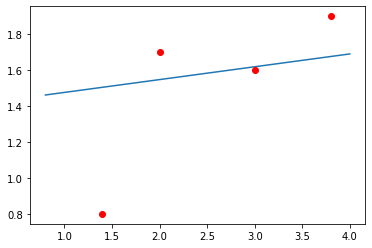

In [230]:
h1 = np.linspace(0.8, 4, 10)
predicted_weight = predict_weight(h1, w1, b)
print(h1)
print(predicted_weight)
plt.plot(
    h1,
    predicted_weight,
)

plt.plot(height, weight, 'o', color='red')

tf.Tensor([0.8  1.44 2.08 2.72 3.36 4.  ], shape=(6,), dtype=float32)
1/1 [==============================] - 0s 19ms/step
[[ 0.5713725  -0.11675659]
 [ 0.64038515 -0.60660946]
 [ 0.70929253 -1.0957156 ]
 [ 0.7783052  -1.5855685 ]
 [ 0.8471074  -2.073928  ]
 [ 0.91612005 -2.563781  ]]
1/1 [==============================] - 0s 24ms/step


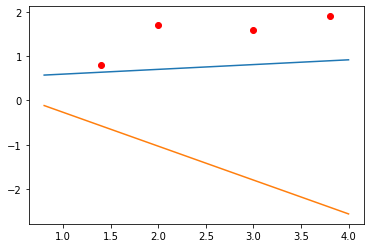

In [231]:
h1 = tf.constant(np.linspace(0.8, 4, 6), dtype=tf.float32)
print(h1)
print(model.predict(h1))
plt.plot(
    h1.numpy().flatten(),
    model.predict(h1),
)

plt.plot(height, weight, 'o', color='red')